# Лабораторная работа №4: Частотный анализ формул численного интегрирования

Выполнили студенты гр. 9382 Павлов Роман и Поплавский Иван.

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования.

## Постановка задачи
Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

## Основные теоретические положения
Рекурсивная формула для метода правых прямоугольников:
$$y_{n+1}=y_n+x_{n+1}$$
Рекурсивная формула для метода трапеций:
$$y_{n+1}=y_n+\frac{1}{2}[x_{n+1}+x_n]$$
Рекурсивная формула Симпсона:
$$y_{n+1}=y_{n-1}+\frac{1}{3}[x_{n+1} + 4x_n + 4_{n-1}]$$
Рекурсивная формула для интегрирования «по правилу 3/8»:
$$y_{n+2} = y_{n-1} + \frac{3}{8}(x_{n+2} + 3x_{n+1} + 3x_n + x_{n-1})$$

## Выполнение работы

1. Вывести формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона. Построить графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства полученных передаточных функций.

#### Метод прямоугольников

Выведем формулу передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников

Рекурсивная формула для метода правых прямоугольников:
$y_{n+1}=y_n+x_{n+1}$

Выразив $y$ через передаточную функцию $A(\omega)$, взяв $x_n = e^{i\omega t}$ получим: $A(\omega) \cdot e^{i \omega (t+1)} = A(\omega) \cdot e^{i\omega t} + e^{i \omega t}$

Отношение вычисленного значения к истинному равно: $$A(\omega) \cdot i \omega = \frac{i \omega}{e^{i \omega}- 1} = \frac{i \omega}{cos(\omega) + isin(\omega) - 1}$$

Выведем формулу передаточных функций рекурсивных фильтров, соответствующих квадратурной формуле трапеций

#### Метод трапеций

Рекурсивная формула для метода трапеций: $y_{n+1}=y_n+\frac{1}{2}[x_{n+1}+x_n]$

Выразив $y$ через передаточную функцию $A(\omega)$, взяв $x_n = e^{i\omega t}$ получим: $A(\omega) \cdot e^{i \omega (t+1)} = A(\omega) \cdot e^{i\omega t} + \frac{1}{2}(e^{i \omega (t+1)} + e^{i\omega t})$

$$A(\omega) = \frac{1}{2} \frac{e^{i \omega} + 1}{e^{i \omega} - 1} = \frac{cos(\omega/2)}{2i sin(\omega/2)}$$

Отношение вычисленного значения к истинному равно: $$A(\omega) \cdot i \omega = \frac{\omega \cdot cos(\omega / 2)}{2 sin(\omega/2)}$$

#### Метод Симпсона

Рекурсивная формула Симпсона: $y_{n+1}=y_{n-1}+\frac{1}{3}[x_{n+1} + 4x_n + 4_{n-1}]$

Выразив $y$ через передаточную функцию $A(\omega)$, взяв $x_n = e^{i\omega t}$ получим:
$$A(\omega) \cdot e^{i \omega (t+1)} = A(\omega) \cdot e^{i\omega (t-1)} + \frac{1}{3}(e^{i \omega (t+1)} + 4e^{i\omega t} + e^{i \omega (t-1)})$$

Преобразуем:
$$A(\omega) = \frac{1}{3}\frac{(e^{i \omega (t+1)} + 4e^{i\omega t} + e^{i \omega (t-1)})}{e^{i\omega (t+1)} - e^{i\omega (t-1)}} = \frac{cos(\omega) + 2}{3isin(\omega)}$$

Отношение вычисленного значения к истинному равно: $A(\omega) \cdot i \omega = \frac{\omega(cos(\omega) + 2)}{3sin(\omega)}$

<hr>

Построим графики для передаточной функции $A(\omega)$ и отношения вычисленного значения к истинному $\tilde{H}(\omega)$ (для прямоугольников):

In [39]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [40]:
rect = lambda x: 1 / (np.cos(x) + 1j * np.sin(x) - 1)
rect_fract = lambda x: rect(x) * 1j * x

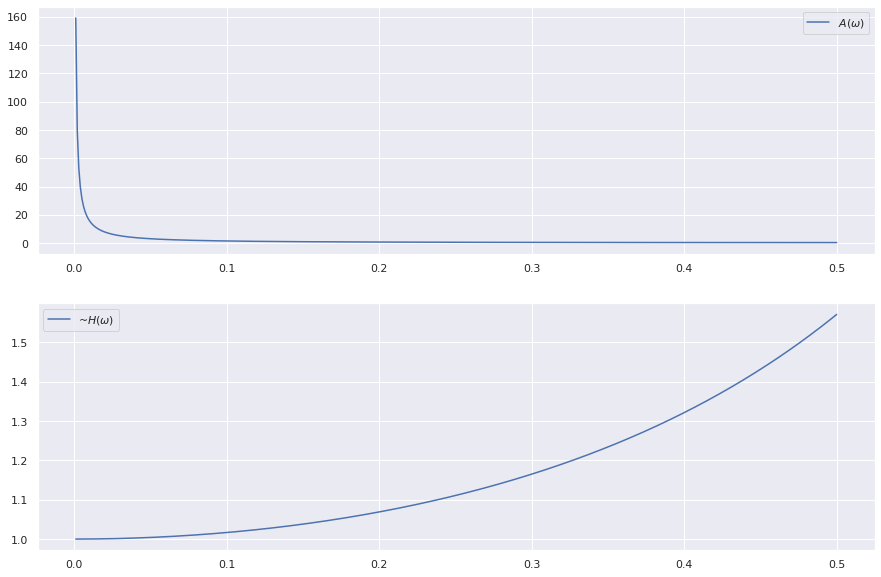

In [41]:
t = np.linspace(0.001, 0.5, 500)

fig, axs = plt.subplots(2, figsize=(15,10))

axs[0].plot(t, np.absolute(rect(t*2*np.pi)), label='$A(\omega)$')
axs[1].plot(t, np.absolute(rect_fract(t*2*np.pi)), label='~${H}(\omega)$')
axs[0].legend()
axs[1].legend()
plt.show()

Исходя из данных графиков видно, что при увеличении частоты точность метода прямогольников стремительно падает.

Построим графики для передаточной функции $A(\omega)$ и отношения вычисленного значения к истинному $\tilde{H}(\omega)$ (для трапеций):

In [42]:
trap = lambda x: np.cos(x / 2) / (2 * 1j * np.sin(x / 2))
trap_fract = lambda x: trap(x) * 1j * x

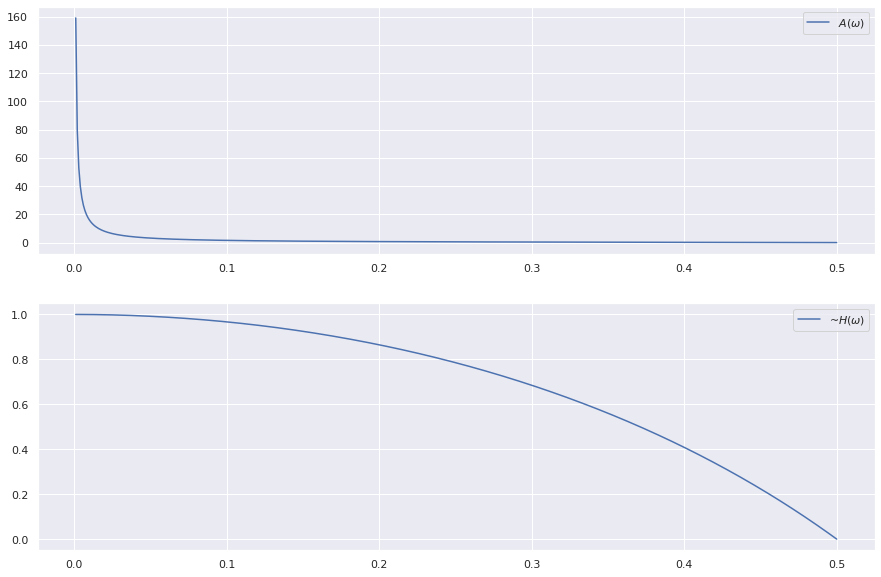

In [43]:
t = np.linspace(0.001, 0.5, 500)

fig, axs = plt.subplots(2, figsize=(15,10))

axs[0].plot(t, np.absolute(trap(t*2*np.pi)), label='$A(\omega)$')
axs[1].plot(t, np.absolute(trap_fract(t*2*np.pi)), label='~${H}(\omega)$')
axs[0].legend()
axs[1].legend()
plt.show()

У метода трапеций с увеличением частоты точность начинает ухудшаться, а вычисленный результат становится меньше истинного

Построим графики для передаточной функции $A(\omega)$ и отношения вычисленного значения к истинному $\tilde{H}(\omega)$ (для Симпсона):

In [44]:
simpson = lambda x: (np.cos(x) + 2) / (3 * 1j * np.sin(x))
simpson_fract = lambda x: simpson(x) * 1j * x

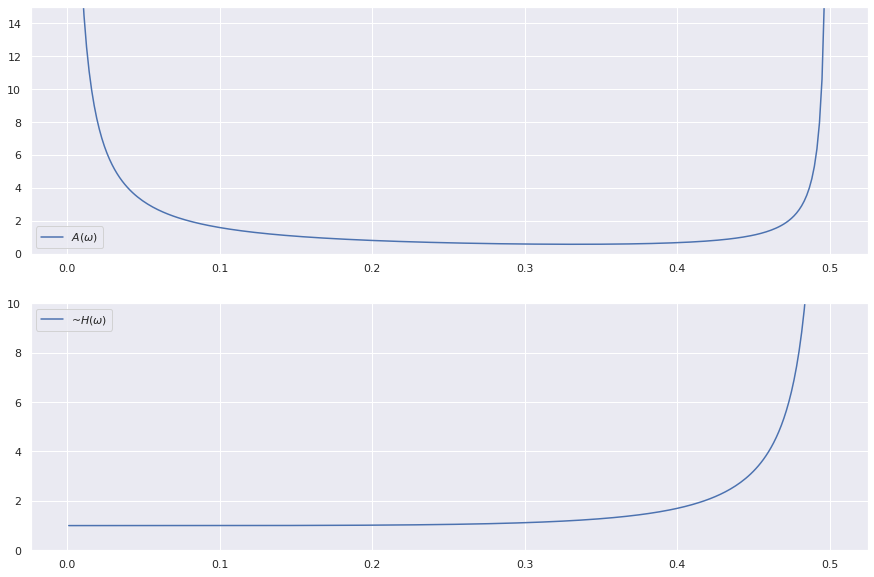

In [57]:
t = np.linspace(0.001, 0.5, 300)

fig, axs = plt.subplots(2, figsize=(15,10))


axs[0].set_ylim(0, 15)
axs[1].set_ylim(0, 10)
axs[0].plot(t, np.absolute(simpson(t*2*np.pi)), label='$A(\omega)$')
axs[1].plot(t, np.absolute(simpson_fract(t*2*np.pi)), label='~${H}(\omega)$')
axs[0].legend()
axs[1].legend()

plt.show()

Для формулы Симпсона можно заметить, что на высоких частотах точность начинает стремительно падать

2. Вывести формулу передаточной функции рекурсивного фильтра для интегрирования «по правилу 3/8»: 

Рекурсивная формула для интегрирования «по правилу 3/8»: $y_{n+2} = y_{n-1} + \frac{3}{8}(x_{n+2} + 3x_{n+1} + 3x_n + x_{n-1})$

Выразив $y$ через передаточную функцию $A(\omega)$, взяв $x_n = e^{i\omega t}$ получим:

$$A(\omega) \cdot e^{i \omega (t+2)} = A(\omega) \cdot e^{i\omega (t-1)} + \frac{3}{8}(e^{i\omega (t+2)} + 3e^{i\omega(t+1)} + 3e^{i\omega t} + e^{i\omega (t-1)})$$

Преобразуем:
$$A(\omega) = \frac{3}{8} \frac{(e^{i\omega (t+2)} + 3e^{i\omega(t+1)} + 3e^{i\omega t} + e^{i\omega (t-1)})}{e^{i\omega(t+2)} - e^{i\omega (t-1)}} = \frac{3cos^3(\omega/2)}{2i sin(3\omega/2)}$$

Отношение вычисленного значения к истинному равно:
$$A(\omega) \cdot i \omega =  \frac{3cos^3(\omega/2) \cdot \omega}{2 sin(3\omega/2)}$$

Построим графики для передаточной функции $A(\omega)$ и отношения вычисленного значения к истинному $\tilde{H}(\omega)$ (для 3/8):

In [46]:
a = lambda x: np.cos(x / 2) ** 3 * 3 / (2 * 1j * np.sin(3 * x / 2))
h = lambda x: a(x) * 1j * x

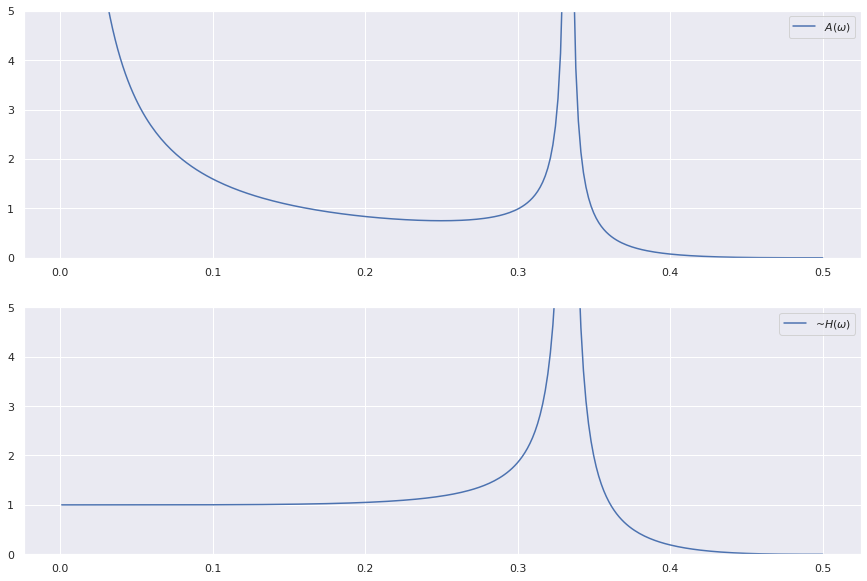

In [47]:
t = np.linspace(0.001, 0.5, 300)

fig, axs = plt.subplots(2, figsize=(15,10))

axs[0].plot(t, np.absolute(a(t*2*np.pi)), label='$A(\omega)$')
axs[1].plot(t, np.absolute(h(t*2*np.pi)), label='~${H}(\omega)$')
axs[0].legend()
axs[1].legend()

axs[0].set_ylim(0, 5)
axs[1].set_ylim(0, 5)
plt.show()

С увеличением частоты точность интегрирования падает. На средних частотах вычисленный результат значительно больше истинного. При увеличении частоты выше результат интегрирования стремительно уменьшается.

3. Провести сопоставительный анализ частотных характеристик передаточных функций, полученных при выполнении пп. 1 и 2.

(0, 3)

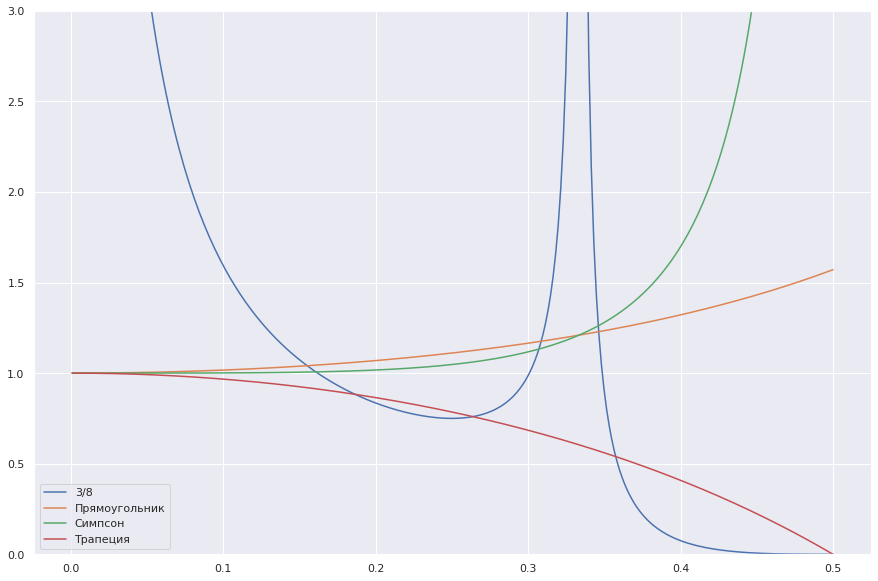

In [56]:
plt.figure(figsize=(15, 10))
plt.plot(t, np.absolute(a(t*2*np.pi)), label='3/8')
plt.plot(t, np.absolute(rect_fract(t*2*np.pi)), label='Прямоугольник')
plt.plot(t, np.absolute(simpson_fract(t*2*np.pi)), label='Симпсон')
plt.plot(t, np.absolute(trap_fract(t*2*np.pi)), label='Трапеция')
plt.legend()
plt.ylim(0, 3)

По полученным данным можно сделать следующие выводы:  
1. Высокочастотные сигналы для формул трапеции и прямоугольников влияют не сильно на полученный результат, в отличии от формулы Симпсона. Но для низких частот они выдают менее точный результат.
2. Сигналы с частотой вблизи 1/3 от частоты дискретизации не сильно влияют на результат, в отличии от правила 3/8.
3. Интегрирование по формуле Симпсона дает наиболее точный результат, при отсутствие высоких частот.
4. Формула трапеций приводит к подавлению высоких частот, а формулы прямоугольников и Симпсона усиливают высокие частоты

### Выводы

В ходе выполнения были получены формулы для передаточных функций рекурсивных фильтров и построены соответствующие графики. Был проведён сравнительный анализ частотных характеристик. Полученные частотные характеристики были смоделированы. 